In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
houses = pd.read_csv('train.csv')

In [5]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


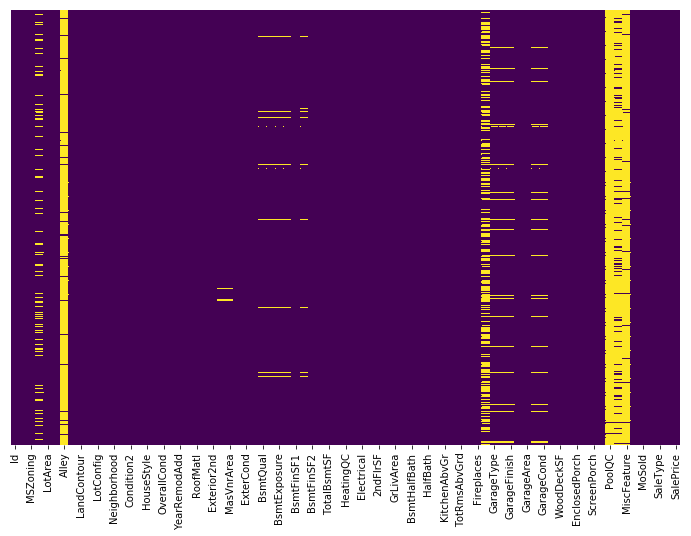

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(houses.isnull(),yticklabels=False,cbar=False,cmap='viridis')

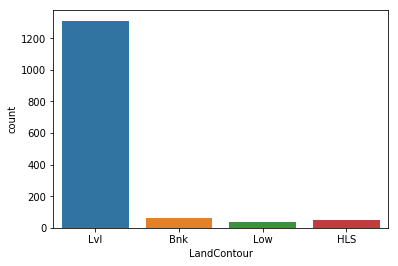

In [7]:
sns.countplot(houses['LandContour'])

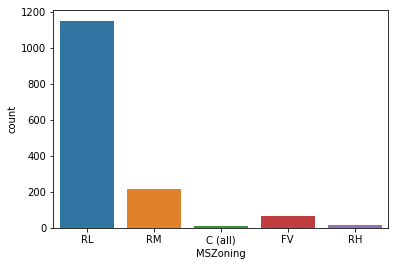

In [8]:
sns.countplot(houses['MSZoning'])

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
num = LabelEncoder()

In [11]:
houses['MSZoning'] = num.fit_transform(houses['MSZoning'].astype('str'))

In [12]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,3,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,3,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,3,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,3,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


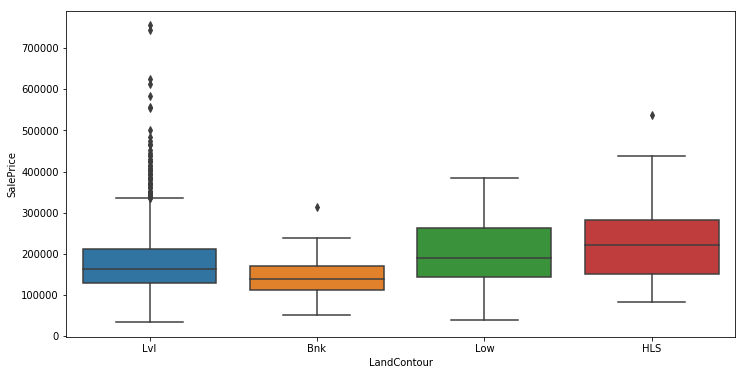

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(data=houses,x='LandContour',y='SalePrice')

In [14]:
houses['LandContour'] = num.fit_transform(houses['LandContour'].astype('str'))

In [15]:
def impute_lot(col):
    LotFrontage = col
    
    if pd.isnull(LotFrontage):
        return 70
    else:
        return LotFrontage
  

In [16]:
houses['LotFrontage'] = houses['LotFrontage'].apply(impute_lot)

In [17]:
houses.drop(['Street','Alley'], axis=1,inplace=True)

In [18]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,Reg,3,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,3,80.0,9600,Reg,3,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,3,68.0,11250,IR1,3,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,3,60.0,9550,IR1,3,AllPub,Corner,Gtl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,3,84.0,14260,IR1,3,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


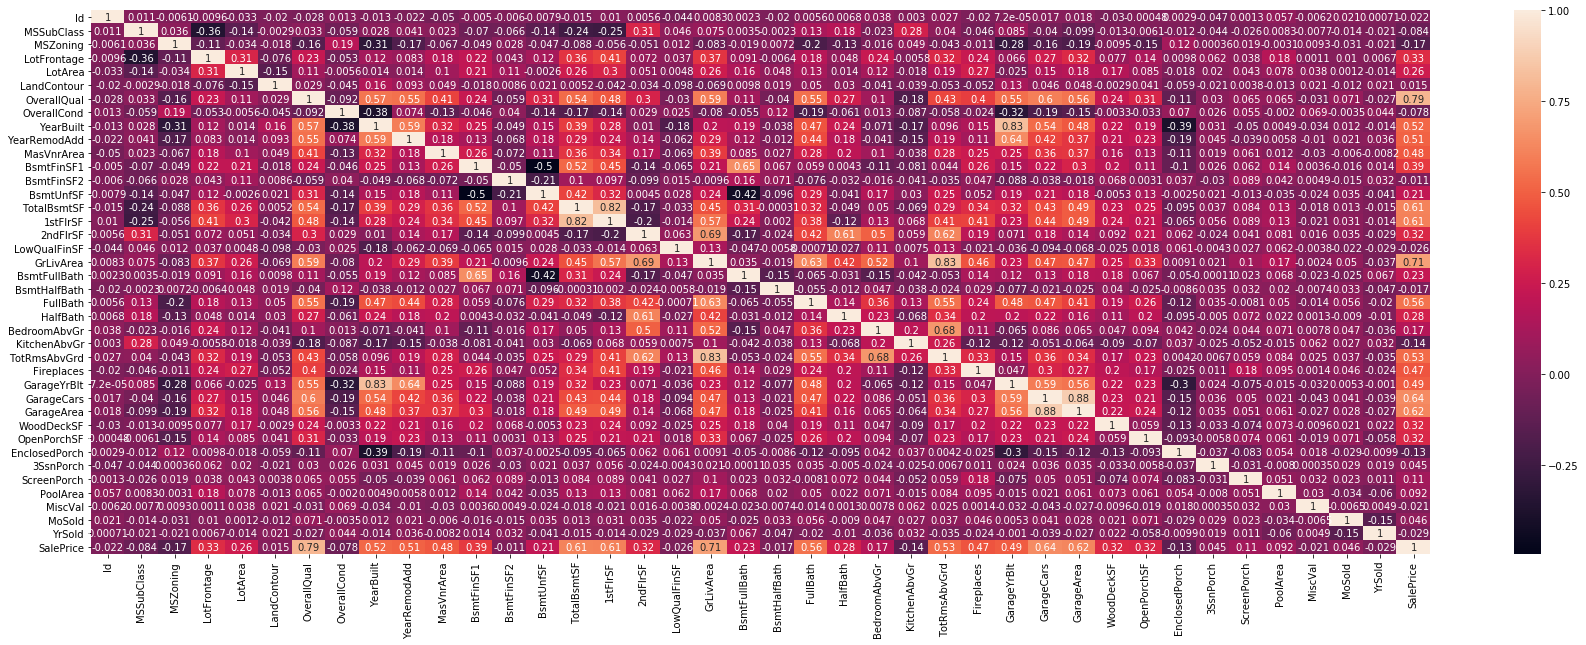

In [19]:
plt.figure(figsize=(30,10))
sns.heatmap(houses.corr(),annot=True)

In [20]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,Reg,3,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,3,80.0,9600,Reg,3,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,3,68.0,11250,IR1,3,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,3,60.0,9550,IR1,3,AllPub,Corner,Gtl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,3,84.0,14260,IR1,3,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Text(0,0.5,'Sale Price')

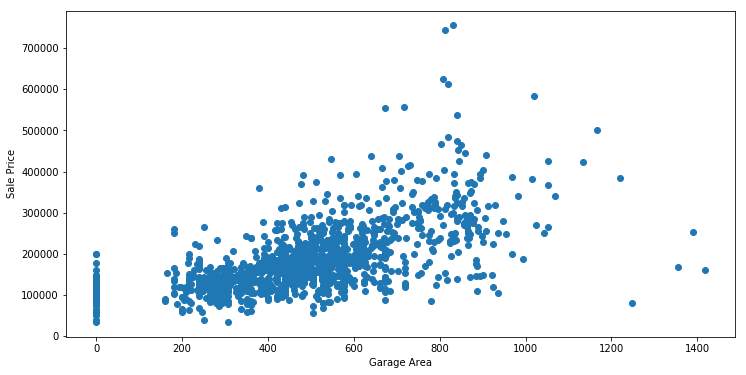

In [21]:
plt.figure(figsize=(12,6))
plt.scatter(x=houses['GarageArea'],y=houses['SalePrice'])
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')

Text(0,0.5,'Sale Price')

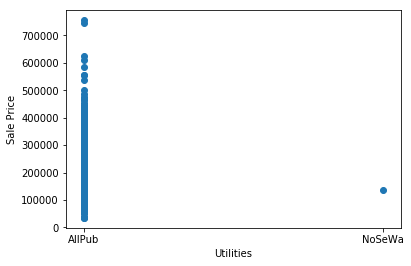

In [22]:
plt.scatter(x=houses['Utilities'],y=houses['SalePrice'])
plt.xlabel('Utilities')
plt.ylabel('Sale Price')


In [23]:
houses.drop('Utilities',axis=1,inplace=True)

In [24]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,Reg,3,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,3,80.0,9600,Reg,3,FR2,Gtl,Veenker,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,3,68.0,11250,IR1,3,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,3,60.0,9550,IR1,3,Corner,Gtl,Crawfor,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,3,84.0,14260,IR1,3,FR2,Gtl,NoRidge,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


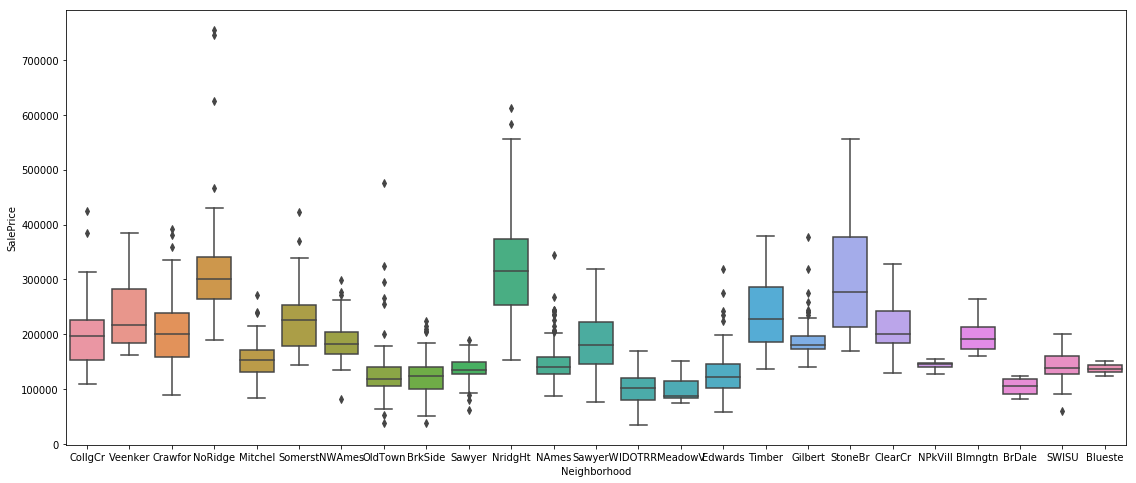

In [25]:
plt.figure(figsize=(19,8))
sns.boxplot(data=houses,x='Neighborhood',y='SalePrice')

(array([  9.,   6.,  37., 122.,  83., 128., 261., 223., 139., 452.]),
 array([1872. , 1885.8, 1899.6, 1913.4, 1927.2, 1941. , 1954.8, 1968.6,
        1982.4, 1996.2, 2010. ]),
 <a list of 10 Patch objects>)

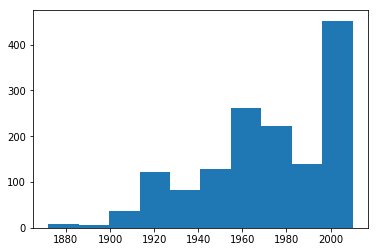

In [26]:
plt.hist(houses['YearBuilt'])

Text(0,0.5,'Sale Price')

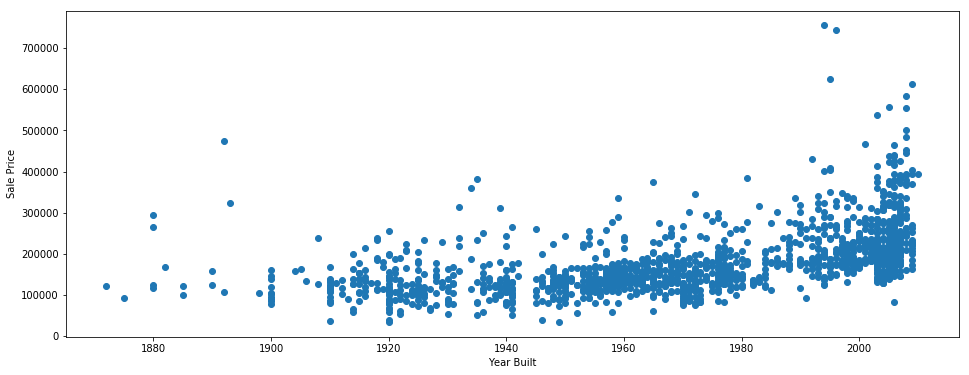

In [27]:
plt.figure(figsize=(16,6))
plt.scatter(x=houses['YearBuilt'],y=houses['SalePrice'])
plt.xlabel('Year Built')
plt.ylabel('Sale Price')



In [28]:
houses = houses[houses['YearBuilt'] >= 1900]


Text(0,0.5,'Sale Price')

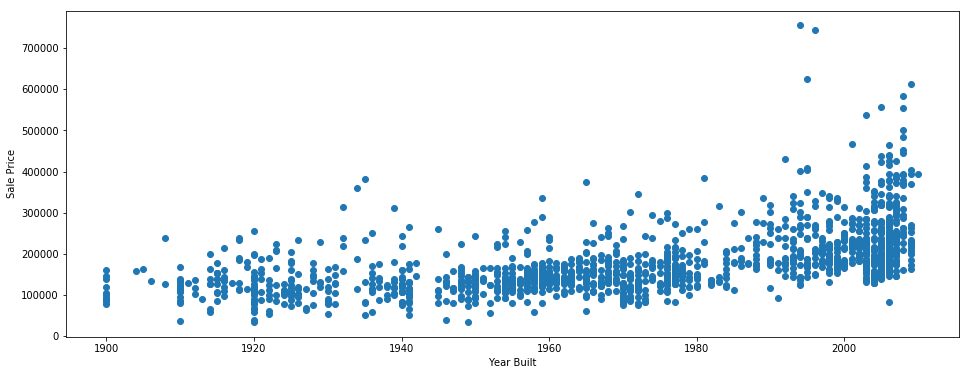

In [29]:
plt.figure(figsize=(16,6))
plt.scatter(x=houses['YearBuilt'],y=houses['SalePrice'])
plt.xlabel('Year Built')
plt.ylabel('Sale Price')

In [30]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,Reg,3,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,3,80.0,9600,Reg,3,FR2,Gtl,Veenker,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,3,68.0,11250,IR1,3,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,3,60.0,9550,IR1,3,Corner,Gtl,Crawfor,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,3,84.0,14260,IR1,3,FR2,Gtl,NoRidge,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [31]:
houses.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       

In [32]:
houses = houses[houses['GrLivArea'] < 3500]

Text(0,0.5,'SalePrice')

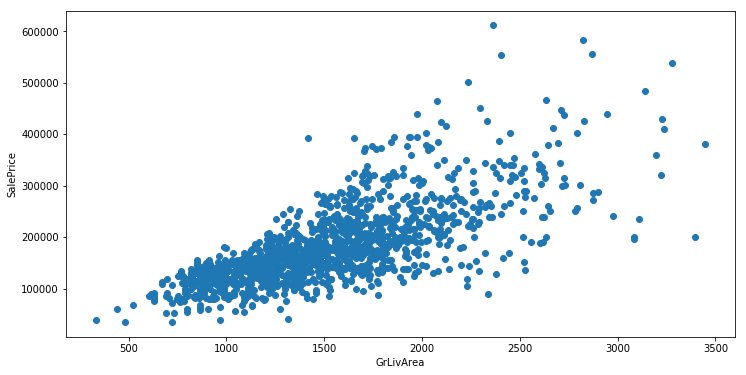

In [33]:
plt.figure(figsize=(12,6))
plt.scatter(x='GrLivArea',y='SalePrice',data=houses)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

In [34]:
houses = houses[houses['GarageArea'] < 1200]

Text(0,0.5,'Sale Price')

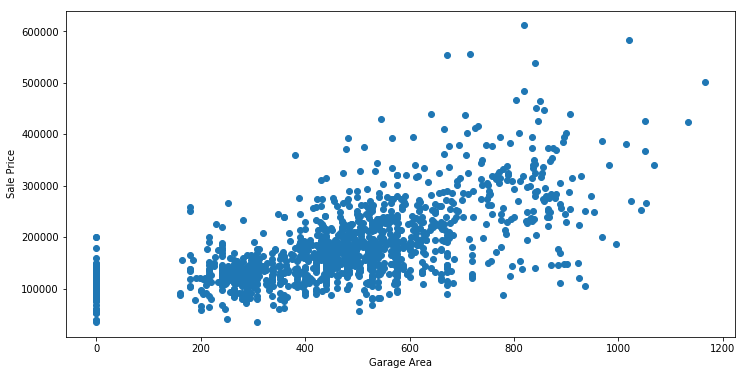

In [35]:
plt.figure(figsize=(12,6))
plt.scatter(x=houses['GarageArea'],y=houses['SalePrice'])
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')

In [36]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,Reg,3,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,3,80.0,9600,Reg,3,FR2,Gtl,Veenker,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,3,68.0,11250,IR1,3,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,3,60.0,9550,IR1,3,Corner,Gtl,Crawfor,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,3,84.0,14260,IR1,3,FR2,Gtl,NoRidge,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


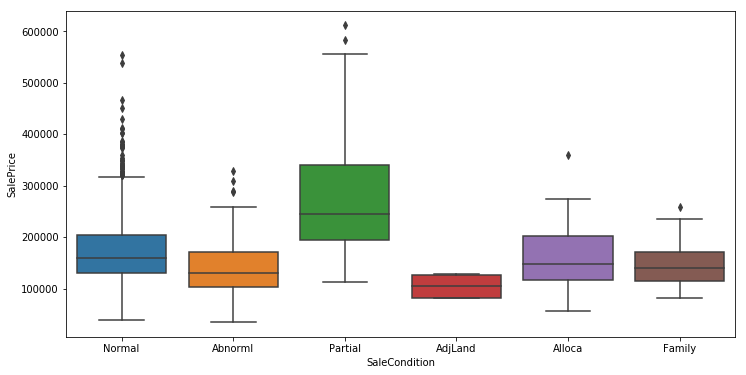

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(x='SaleCondition',y='SalePrice',data=houses)

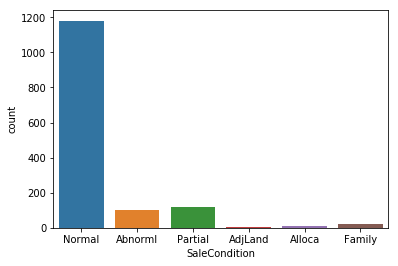

In [38]:
sns.countplot('SaleCondition',data=houses)

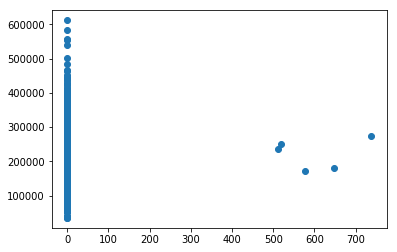

In [39]:
plt.scatter(x='PoolArea',y='SalePrice',data=houses)

In [40]:
houses.drop('PoolArea',axis=1,inplace=True)

In [41]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,Reg,3,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,3,80.0,9600,Reg,3,FR2,Gtl,Veenker,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,3,68.0,11250,IR1,3,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,3,60.0,9550,IR1,3,Corner,Gtl,Crawfor,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,3,84.0,14260,IR1,3,FR2,Gtl,NoRidge,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [42]:
houses_categorical = houses.select_dtypes(include=['object']).copy()

In [43]:
houses_categorical.head()

,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,Reg,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,Reg,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,IR1,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,IR1,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,IR1,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [44]:
print(houses_categorical.isnull().values.sum())

5166


In [45]:
print(houses_categorical.isnull().sum())

LotShape            0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       679
GarageType         79
GarageFinish       79
GarageQual         79
GarageCond         79
PavedDrive          0
PoolQC           1431
Fence            1160
MiscFeature      1384
SaleType            0
SaleCondition       0
dtype: int64


In [46]:
houses_categorical = houses_categorical.fillna(houses_categorical['MiscFeature'].value_counts().index[0])

In [47]:
houses

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,Reg,3,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,3,80.0,9600,Reg,3,FR2,Gtl,Veenker,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,3,68.0,11250,IR1,3,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,3,60.0,9550,IR1,3,Corner,Gtl,Crawfor,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,3,84.0,14260,IR1,3,FR2,Gtl,NoRidge,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,3,85.0,14115,IR1,3,Inside,Gtl,Mitchel,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,3,75.0,10084,Reg,3,Inside,Gtl,Somerst,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,3,70.0,10382,IR1,3,Corner,Gtl,NWAmes,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,4,51.0,6120,Reg,3,Inside,Gtl,OldTown,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,3,50.0,7420,Reg,3,Corner,Gtl,BrkSide,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [48]:
houses_categorical.columns

Index(['LotShape', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [49]:
houses.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LandContour,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.004818,-0.006063,-0.025507,-0.039822,-0.017551,-0.029496,0.022512,-0.006648,-0.017337,...,0.014609,-0.031196,-0.001755,-0.000286,-0.046322,0.009546,-0.005495,0.020560,-0.003959,-0.023863
MSSubClass,0.004818,1.000000,0.028015,-0.382225,-0.149294,-0.000724,0.038429,-0.062575,0.043525,0.046566,...,-0.110067,-0.017711,-0.008481,-0.017123,-0.043601,-0.027572,-0.006420,-0.009759,-0.023109,-0.089842
MSZoning,-0.006063,0.028015,1.000000,-0.110971,-0.034839,-0.022622,-0.180157,0.174085,-0.289586,-0.184594,...,-0.190931,-0.006478,-0.181071,0.103791,0.001718,0.014909,0.013293,-0.038324,-0.022845,-0.186157
LotFrontage,-0.025507,-0.382225,-0.110971,1.000000,0.271270,-0.044678,0.204923,-0.053433,0.118886,0.075067,...,0.289670,0.066035,0.101421,0.022428,0.069074,0.041957,0.001516,0.021135,0.009723,0.334559
LotArea,-0.039822,-0.149294,-0.034839,0.271270,1.000000,-0.130381,0.083806,-0.005762,0.009048,0.005947,...,0.150181,0.160706,0.060309,-0.013570,0.022256,0.041614,0.039283,0.009423,-0.008691,0.261867
LandContour,-0.017551,-0.000724,-0.022622,-0.044678,-0.130381,1.000000,0.041734,-0.048884,0.178513,0.101218,...,0.075492,0.001695,0.065480,-0.061538,-0.022446,0.000802,0.021475,-0.014590,0.017058,0.008749
OverallQual,-0.029496,0.038429,-0.180157,0.204923,0.083806,0.041734,1.000000,-0.111585,0.609938,0.552120,...,0.570015,0.234648,0.287575,-0.112042,0.032797,0.056637,-0.028530,0.075612,-0.019798,0.800375
OverallCond,0.022512,-0.062575,0.174085,-0.053433,-0.005762,-0.048884,-0.111585,1.000000,-0.367614,0.065459,...,-0.160877,0.000024,-0.049944,0.059949,0.026969,0.042994,0.071299,-0.003313,0.043294,-0.097430
YearBuilt,-0.006648,0.043525,-0.289586,0.118886,0.009048,0.178513,0.609938,-0.367614,1.000000,0.620708,...,0.512346,0.221996,0.221019,-0.379044,0.029731,-0.047028,-0.035609,0.027726,-0.005869,0.567002
YearRemodAdd,-0.017337,0.046566,-0.184594,0.075067,0.005947,0.101218,0.552120,0.065459,0.620708,1.000000,...,0.378956,0.203593,0.229278,-0.206493,0.045943,-0.040976,-0.009106,0.023490,0.038518,0.525906


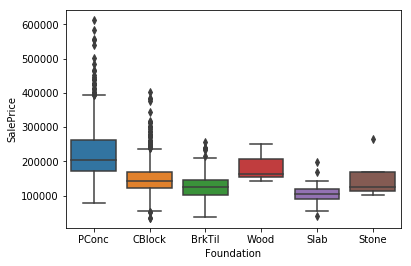

In [50]:
sns.boxplot(x='Foundation',y='SalePrice',data=houses)

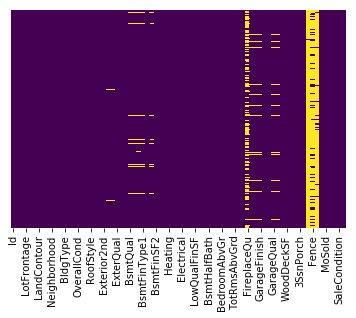

In [51]:
sns.heatmap(houses.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [52]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,Reg,3,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,3,80.0,9600,Reg,3,FR2,Gtl,Veenker,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,3,68.0,11250,IR1,3,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,3,60.0,9550,IR1,3,Corner,Gtl,Crawfor,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,3,84.0,14260,IR1,3,FR2,Gtl,NoRidge,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


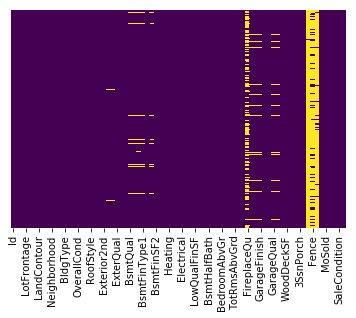

In [53]:
sns.heatmap(houses.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [54]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,Reg,3,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,3,80.0,9600,Reg,3,FR2,Gtl,Veenker,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,3,68.0,11250,IR1,3,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,3,60.0,9550,IR1,3,Corner,Gtl,Crawfor,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,3,84.0,14260,IR1,3,FR2,Gtl,NoRidge,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


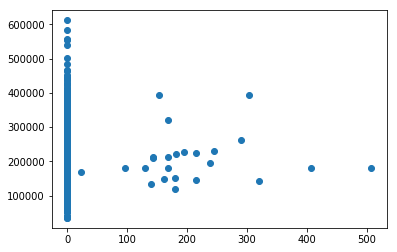

In [55]:
plt.scatter(x='3SsnPorch',y='SalePrice',data=houses)

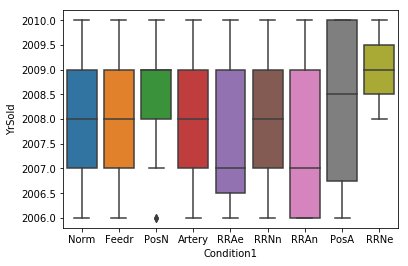

In [56]:
sns.boxplot('Condition1','YrSold',data=houses)

In [57]:
houses.corr().head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LandContour,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.004818,-0.006063,-0.025507,-0.039822,-0.017551,-0.029496,0.022512,-0.006648,-0.017337,...,0.014609,-0.031196,-0.001755,-0.000286,-0.046322,0.009546,-0.005495,0.020560,-0.003959,-0.023863
MSSubClass,0.004818,1.000000,0.028015,-0.382225,-0.149294,-0.000724,0.038429,-0.062575,0.043525,0.046566,...,-0.110067,-0.017711,-0.008481,-0.017123,-0.043601,-0.027572,-0.006420,-0.009759,-0.023109,-0.089842
MSZoning,-0.006063,0.028015,1.000000,-0.110971,-0.034839,-0.022622,-0.180157,0.174085,-0.289586,-0.184594,...,-0.190931,-0.006478,-0.181071,0.103791,0.001718,0.014909,0.013293,-0.038324,-0.022845,-0.186157
LotFrontage,-0.025507,-0.382225,-0.110971,1.000000,0.271270,-0.044678,0.204923,-0.053433,0.118886,0.075067,...,0.289670,0.066035,0.101421,0.022428,0.069074,0.041957,0.001516,0.021135,0.009723,0.334559
LotArea,-0.039822,-0.149294,-0.034839,0.271270,1.000000,-0.130381,0.083806,-0.005762,0.009048,0.005947,...,0.150181,0.160706,0.060309,-0.013570,0.022256,0.041614,0.039283,0.009423,-0.008691,0.261867


In [58]:
houses

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,Reg,3,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,3,80.0,9600,Reg,3,FR2,Gtl,Veenker,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,3,68.0,11250,IR1,3,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,3,60.0,9550,IR1,3,Corner,Gtl,Crawfor,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,3,84.0,14260,IR1,3,FR2,Gtl,NoRidge,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,3,85.0,14115,IR1,3,Inside,Gtl,Mitchel,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,3,75.0,10084,Reg,3,Inside,Gtl,Somerst,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,3,70.0,10382,IR1,3,Corner,Gtl,NWAmes,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,4,51.0,6120,Reg,3,Inside,Gtl,OldTown,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,3,50.0,7420,Reg,3,Corner,Gtl,BrkSide,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [59]:
houses['PoolQC'].isnull().sum()

1431

In [60]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,Reg,3,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,3,80.0,9600,Reg,3,FR2,Gtl,Veenker,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,3,68.0,11250,IR1,3,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,3,60.0,9550,IR1,3,Corner,Gtl,Crawfor,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,3,84.0,14260,IR1,3,FR2,Gtl,NoRidge,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
houses.drop(['PoolQC','MiscFeature'],axis=1,inplace=True)

In [62]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,Reg,3,Inside,Gtl,CollgCr,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,3,80.0,9600,Reg,3,FR2,Gtl,Veenker,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,3,68.0,11250,IR1,3,Inside,Gtl,CollgCr,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,3,60.0,9550,IR1,3,Corner,Gtl,Crawfor,...,272,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,3,84.0,14260,IR1,3,FR2,Gtl,NoRidge,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


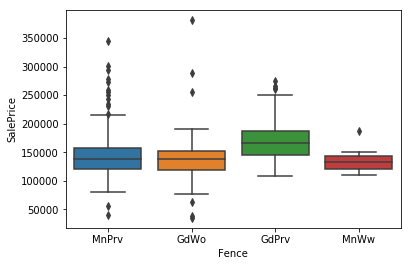

In [63]:
sns.boxplot(y='SalePrice',x='Fence',data=houses)

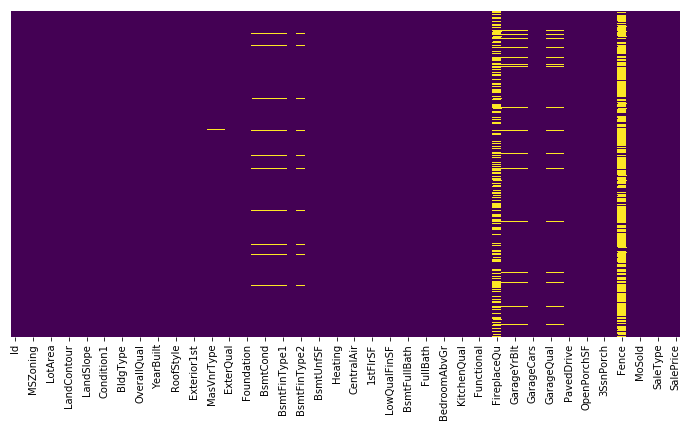

In [64]:
plt.figure(figsize=(12,6))
sns.heatmap(houses.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [65]:
houses['Fireplaces'].isnull().sum()

0

In [66]:
houses.drop(['Fence','KitchenAbvGr','MSZoning'],axis=1,inplace=True)

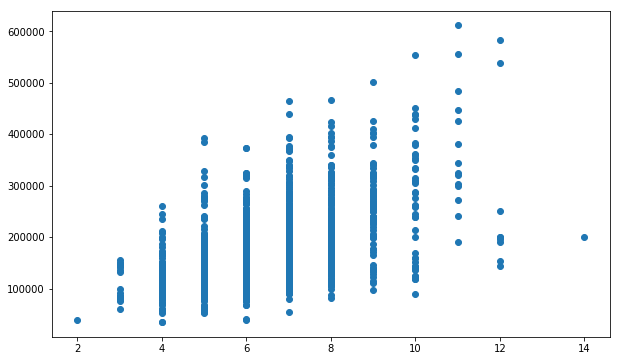

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(x='TotRmsAbvGrd',y='SalePrice',data=houses)

In [68]:
houses = houses[houses['TotRmsAbvGrd'] > 2] 
houses = houses[houses['TotRmsAbvGrd'] < 14]


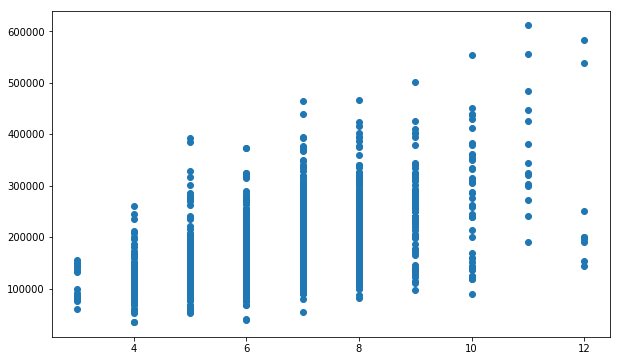

In [69]:
plt.figure(figsize=(10,6))
plt.scatter(x='TotRmsAbvGrd',y='SalePrice',data=houses)